<a href="https://colab.research.google.com/github/vbang247/python/blob/main/predicting_survival_of%20_titanic_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mullens, Miss. Katherine ""Katie""",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [ ]:
titanic.loc[:, titanic.isna().any()]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [ ]:
# TODO
titanic[['Embarked','Age','Cabin']].isna().sum()

Embarked      2
Age         177
Cabin       687
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:
# TODO
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Cabin'] = titanic['Cabin'].fillna('other')
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
#titanic.loc[:, titanic.isna().any()]


### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [ ]:
# TODO
titanic.sort_values(by='Fare', ascending=False)['Name'].reset_index().iloc[[15]]

,index,Name
15,527,"Farthing, Mr. John"


### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [ ]:
# TODO
titanic.loc[(titanic['Sex']=='female') & (titanic['Survived']==1)].sort_values(by='Fare', ascending=False)['Name'].reset_index().iloc[[5]]

,index,Name
5,299,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)"


### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [ ]:
# TODO
#titanic_survived = titanic[titanic['Survived']==1]
titanic[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).mean()
#titanic[['Pclass', 'Survived','Sex']].groupby(['Pclass', 'Sex'], as_index = False).mean().sort_values('Survived', ascending = False)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

# **We see that the survival rate of women of Pclass 1 is the highest. Additionally, the chance of survival of females is more than males for all classes**

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

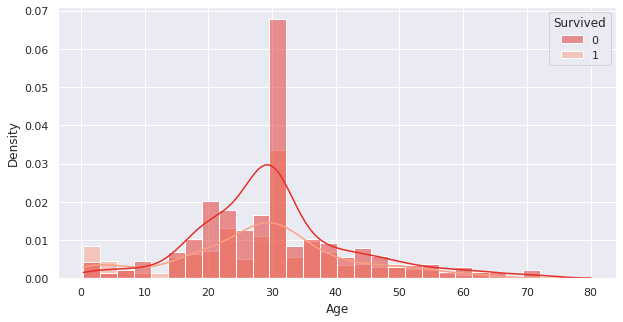

In [ ]:
# TODO
fig = plt.figure(figsize = [10, 5])
#plt.subplot(1,2,1)
#plt.hist(titanic.loc[titanic['Survived']==1, 'Age'],bins=20)
#plt.subplot(1,2,2)
#plt.hist(titanic.loc[titanic['Survived']==0, 'Age'],bins=20, alpha = 0.8)
#plt.show()
sns.histplot(data=titanic, x='Age', hue='Survived',kde=True,stat='density',legend=True, palette='Reds_r')

## **Infants had a higher survival rate as seen from the above histogram. Also, youth aged between 25-35 had a very high survival chance.**

[(-0.01, 0.07), (-10.0, 300.0)]

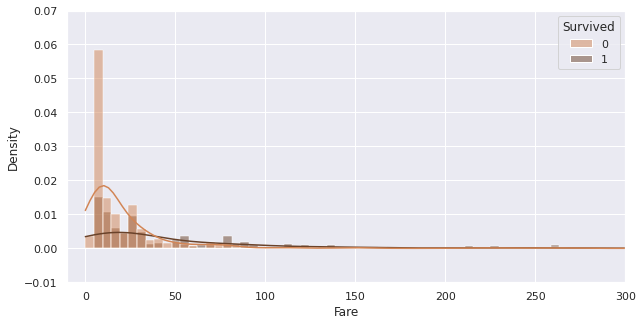

In [ ]:
# TODO
fig = plt.figure(figsize = [10, 5])
#plt.subplot(1,2,1)
#plt.hist(titanic.loc[titanic['Survived']==1, 'Age'],bins=20)
#plt.subplot(1,2,2)
#plt.hist(titanic.loc[titanic['Survived']==0, 'Age'],bins=20, alpha = 0.8)
#plt.show()
sns.histplot(data=titanic, x='Fare', hue='Survived',kde=True,stat='density',legend=True, palette='copper_r').set(xlim=(-10,300), ylim=(-0.01,0.07))

## **People who purchased tickets with lowest fare were more likely to not survive. Either they did not have a cabin or they may belong to Pclass 3.**

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

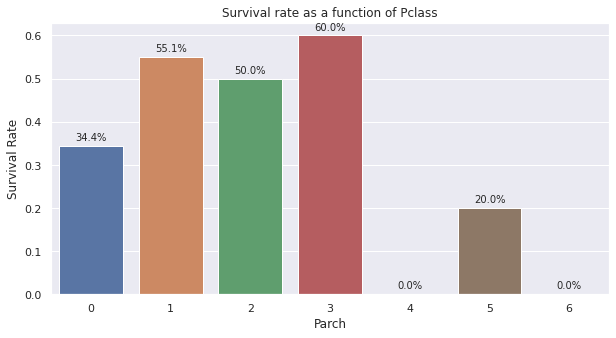

In [ ]:
#fig5, ax = plt.subplots()
plt.figure(figsize=(10,5))
total_count = titanic['Survived'].count()
ax = sns.barplot(x='Parch', y='Survived', data=titanic, ci=None)
plt.ylabel("Survival Rate")
plt.title("Survival rate as a function of Pclass")
for p in ax.patches:
    ax.annotate('{:2.1f}%'.format(p.get_height() * 100), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + 0.02),ha = 'center', va = 'center') 

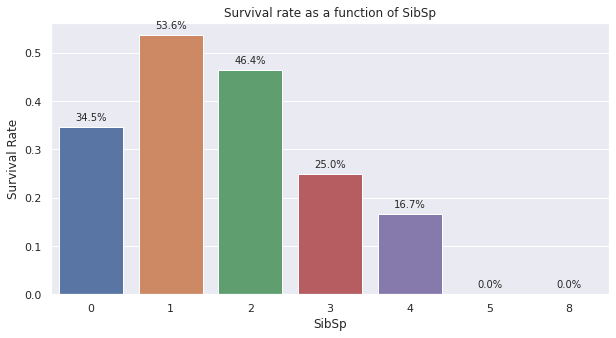

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='SibSp', y='Survived', data=titanic, ci=None)
plt.ylabel("Survival Rate")
plt.title("Survival rate as a function of SibSp")
for p in ax.patches:
    ax.annotate('{:2.1f}%'.format(p.get_height() * 100), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + 0.02),ha = 'center', va = 'center') 

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

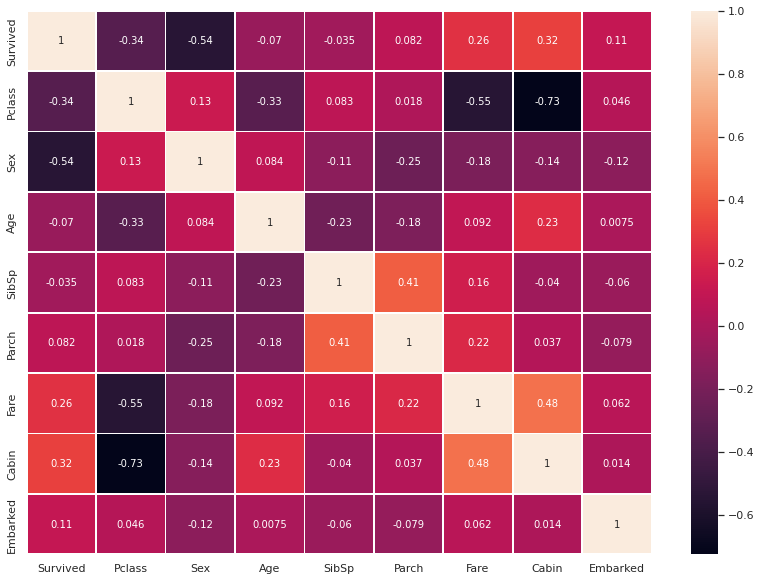

In [ ]:
# TODO
titanic_new = titanic
titanic_new['Embarked'] = titanic_new.Embarked.replace({'S':0, 'C':1, 'Q':2})
titanic_new['Sex'] = titanic_new.Sex.replace({'male': 1, 'female':0})
titanic_new.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
titanic_new['Cabin'] = titanic_new.Cabin.replace(regex={r'^[A-Z].*':1, 'other':0})
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic_new.corr(), annot=True, linewidths=0.8)

**The first row contains the values that represent the correlation of each variable with the target variable 'Survived'. ‘Cabin’ and ‘Fare’ are highly (positively) correlated with the target variable and ‘Sex’, 'Pclass' is inversely correlated with the target variable. This means as fare increases the survival probability increases. If the person has cabin the chances of survival are higher**

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

([<matplotlib.axis.XTick at 0x7f5ce3e80ed0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'male')])

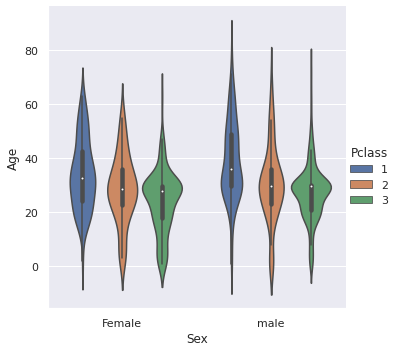

In [ ]:
# TODO
sns.catplot(x='Sex', y='Age', data=titanic, hue='Pclass', kind='violin')
plt.xticks([0, 1], ['Female', 'male'])

### **From the plot, we conclude that most of the older travellers on the ship were in first class. It may be derived that they were wealthy. The younger passengers who are in the age group 25-35 were mostly in second and third classes.**

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [ ]:
# TODO

#taking initial titanice dataframe degfined in cell 1 as training dataset
train = titanic_new
x_train = train.drop(columns=['Survived'], axis=1)
y_train = train['Survived']

test = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv")

#Filling na values
test['Age'] = test['Age'].fillna(titanic['Age'].mean())
test['Cabin'] = test['Cabin'].fillna('other')
test['Embarked'] = test['Embarked'].fillna(titanic['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(titanic['Fare'].mean())

#Converting categorical columns to numerical
test['Embarked'] = test.Embarked.replace({'S':0, 'C':1, 'Q':2})
test['Sex'] = test.Sex.replace({'male': 1, 'female':0})
test.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
test['Cabin'] = test.Cabin.replace(regex={r'^[A-Z].*':1, 'other':0})

x_test = test

#LR Model
model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
print("LR model coefficients: {}\n".format(model.coef_))
print("LR model intercept: {}\n".format(model.intercept_))
y_pred = model.predict(x_train)
y_test = model.predict(x_test)
accuracy_score(y_train, y_pred)
print("model accuracy on train set: {}\n".format(accuracy_score(y_train, y_pred)))
print("probability of survival for all the passengers in the test dataset:\n\n {}".format(y_test))

LR model coefficients: [[-8.80729022e-01 -2.61519439e+00 -4.01006110e-02 -3.21816982e-01
  -8.79531008e-02  1.59475370e-03  6.53132651e-01  2.41096029e-01]]

LR model intercept: [4.19225487]

model accuracy on train set: 0.8024691358024691

probability of survival for all the passengers in the test dataset:

 [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0

### **The Logistic Regression Model's accuracy is lower. We can try Random Forest or Decision tree to see if the accuracy of prediction does indeed increase with these algorithms**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_model.score(x_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

score = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'], 'Score':[accuracy_score(y_train, y_pred), rf_model.score(x_train, y_train), dt_model.score(x_train, y_train)]})
score.set_index('Score').sort_values(by='Score', ascending=False)

,Model
Score,
0.986532,Random Forest
0.986532,Decision Tree
0.802469,Logistic Regression
